In [2]:
import sys
sys.path.append('..')

import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.datasets import make_blobs

plt.style.use('astroLuSt.styles.LuSt_style')


from astroLuSt.visualization import plots as alvp

# Parallel Coordinate Plot

Generate a dummy dataset

In [126]:
nsamples = 100

id = np.random.choice(['A', 'B', 'C', 'D'], size=(nsamples,1))
x1 = np.random.rand(*(nsamples,1))
x2 = np.random.randint(50, 10000, (nsamples,1), dtype=int)
x3 = np.random.choice(['relu', 'sigmoid', 'tanh',], size=(nsamples,1))
score = np.random.uniform(0, 100, (nsamples,1))
score[:5] = np.nan
score[5:7] = 0
score[7:10] = -1
score = np.random.uniform(0.3, 0.8, (nsamples,1))
X = {
    '#':id.flatten(),
    'x1':x1.flatten(),
    'x2':x2.flatten(),
    'x3':x3.flatten(),
    'score':score.flatten(),
    # 'acc':score.flatten(),
}

df = pl.DataFrame(data=X)
print(df)

df_np = df.select(pl.col(['x1','x2','score'])).to_numpy()


shape: (100, 5)
┌─────┬──────────┬──────┬─────────┬──────────┐
│ #   ┆ x1       ┆ x2   ┆ x3      ┆ score    │
│ --- ┆ ---      ┆ ---  ┆ ---     ┆ ---      │
│ str ┆ f64      ┆ i32  ┆ str     ┆ f64      │
╞═════╪══════════╪══════╪═════════╪══════════╡
│ D   ┆ 0.953432 ┆ 6195 ┆ relu    ┆ 0.354156 │
│ B   ┆ 0.617306 ┆ 420  ┆ relu    ┆ 0.578824 │
│ C   ┆ 0.503919 ┆ 8993 ┆ sigmoid ┆ 0.7487   │
│ A   ┆ 0.991403 ┆ 9508 ┆ tanh    ┆ 0.450597 │
│ ... ┆ ...      ┆ ...  ┆ ...     ┆ ...      │
│ B   ┆ 0.178693 ┆ 4852 ┆ tanh    ┆ 0.378328 │
│ D   ┆ 0.234917 ┆ 2843 ┆ tanh    ┆ 0.528388 │
│ A   ┆ 0.085233 ┆ 2835 ┆ relu    ┆ 0.581274 │
│ A   ┆ 0.25338  ┆ 337  ┆ tanh    ┆ 0.636758 │
└─────┴──────────┴──────┴─────────┴──────────┘


Let's look at the different features/coordinates

INFO(ParallelCoordinates): Removed
    0 row(s) via (-inf < score < inf),
    0 row(s) containig nans,
    0 row(s) total.

INFO(ParallelCoordinates): Removed
    0 row(s) where score evaluated to inf or -inf due to "score_scaling",



[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


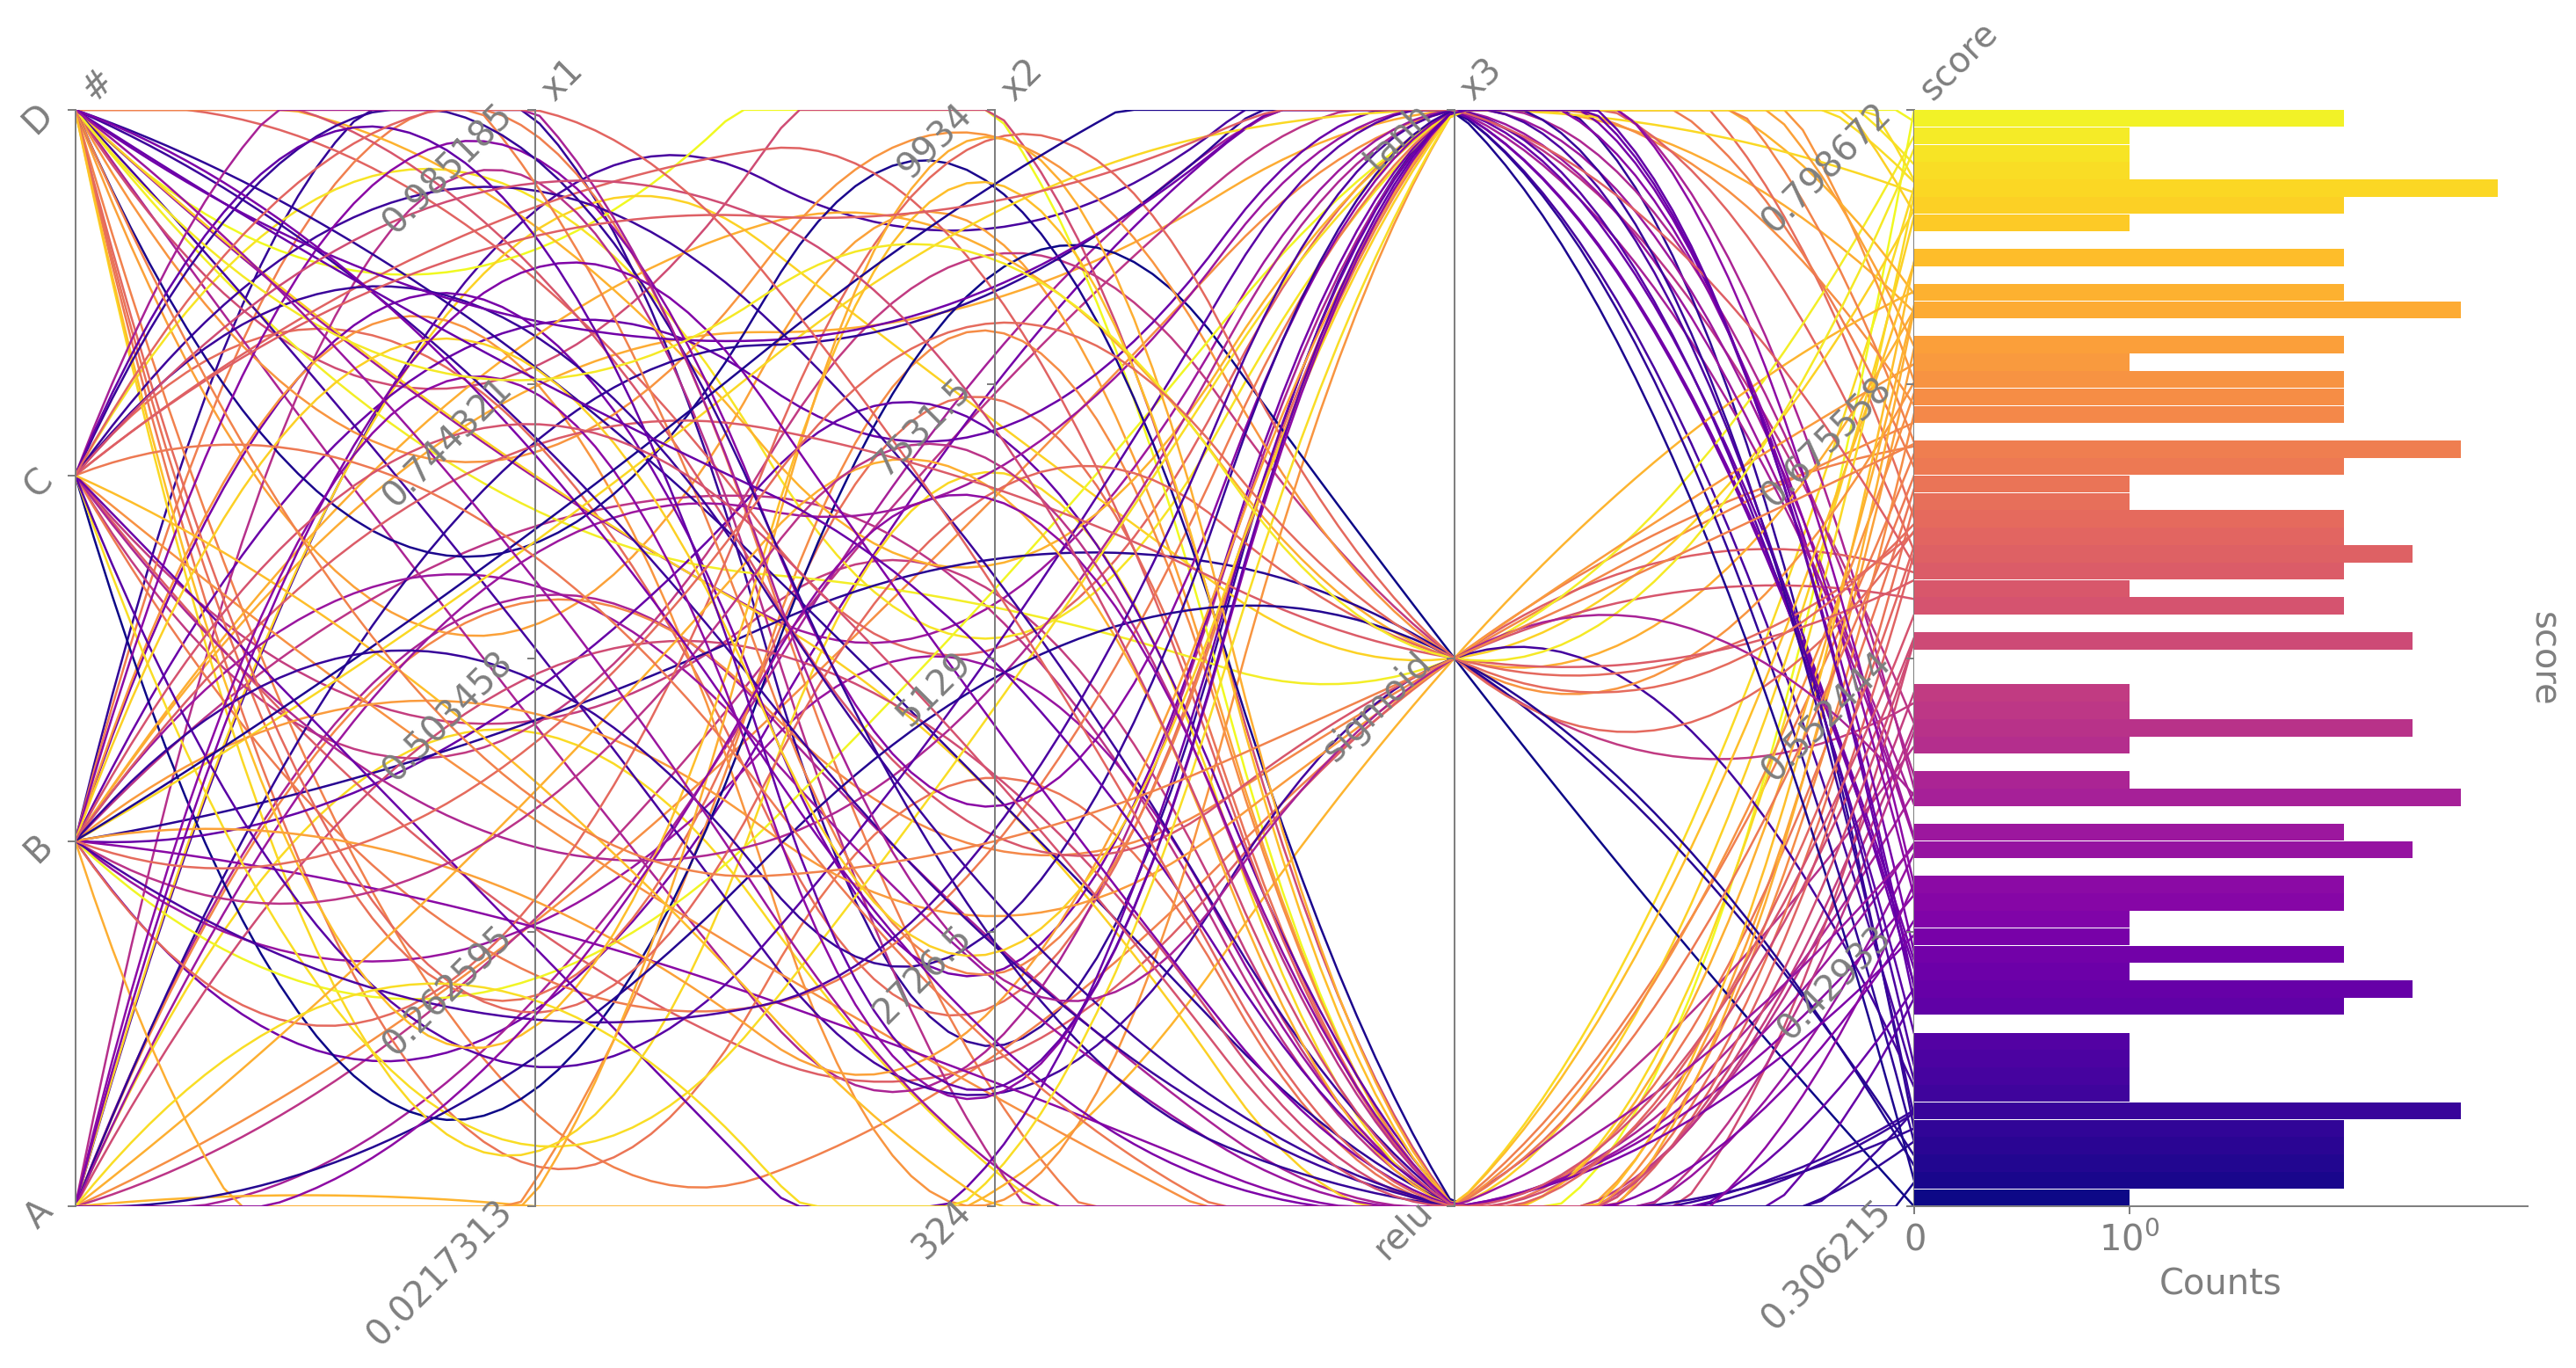

In [90]:
importlib.reload(alvp)


PC = alvp.ParallelCoordinates(
    show_idcol=True,
    interpkind='quadratic',
    # interpkind=1,
    res=100,
    axpos_coord=None, axpos_hist=None,
    map_suffix='__map__',
    ticks2display=5, tickcolor='tab:grey', ticklabelrotation=45, tickformat='%g',
    nancolor='tab:grey', nanfrac=4/256,
    linealpha=1, linewidth=1,
    base_cmap='plasma', cbar_over_hist=False,
    n_jobs=6, n_jobs_addaxes=1, sleep=0.0,
    verbose=1,
    text_kwargs=None,    
)
# print(PC)
fig, axs = PC.plot(
    coordinates=df,
    id_col='#',
    score_col='score',
    # score_col='acc',
    coords_cols=r'^.*$',
    min_score=None, max_score=None, remove_nanscore=False,
    # score_scaling='np.log10(pl.col(score_col))',
    score_scaling='pl.col(score_col)',
    show_idcol=None,
    interpkind=None,
    res=None,
    axpos_coord=None, axpos_hist=None,
    ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
    # coordinate_labs=['0', '1', '2', '3', '4'],
    nancolor=None, nanfrac=None,
    linealpha=None, linewidth=None,
    base_cmap=None, cbar_over_hist=None,
    n_jobs=None, n_jobs_addaxes=None, sleep=None,
    map_suffix=None,
    save=False,
    max_nretries=4,
    verbose=None,
    text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
)

plt.show()

Also works with np.ndarrays, if they are not of dtype object

INFO(ParallelCoordinates): Removed
    0 row(s) via (-inf < column_2 < inf),
    5 row(s) containig nans,
    5 row(s) total.

INFO(ParallelCoordinates): Removed
    2 row(s) where column_2 evaluated to inf or -inf due to "score_scaling",



C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\polars\internals\series\series.py:982: RuntimeWarning: divide by zero encountered in log10
  series = f(lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs))
C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\polars\internals\series\series.py:982: RuntimeWarning: invalid value encountered in log10
  series = f(lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs))
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  93 out of  93 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


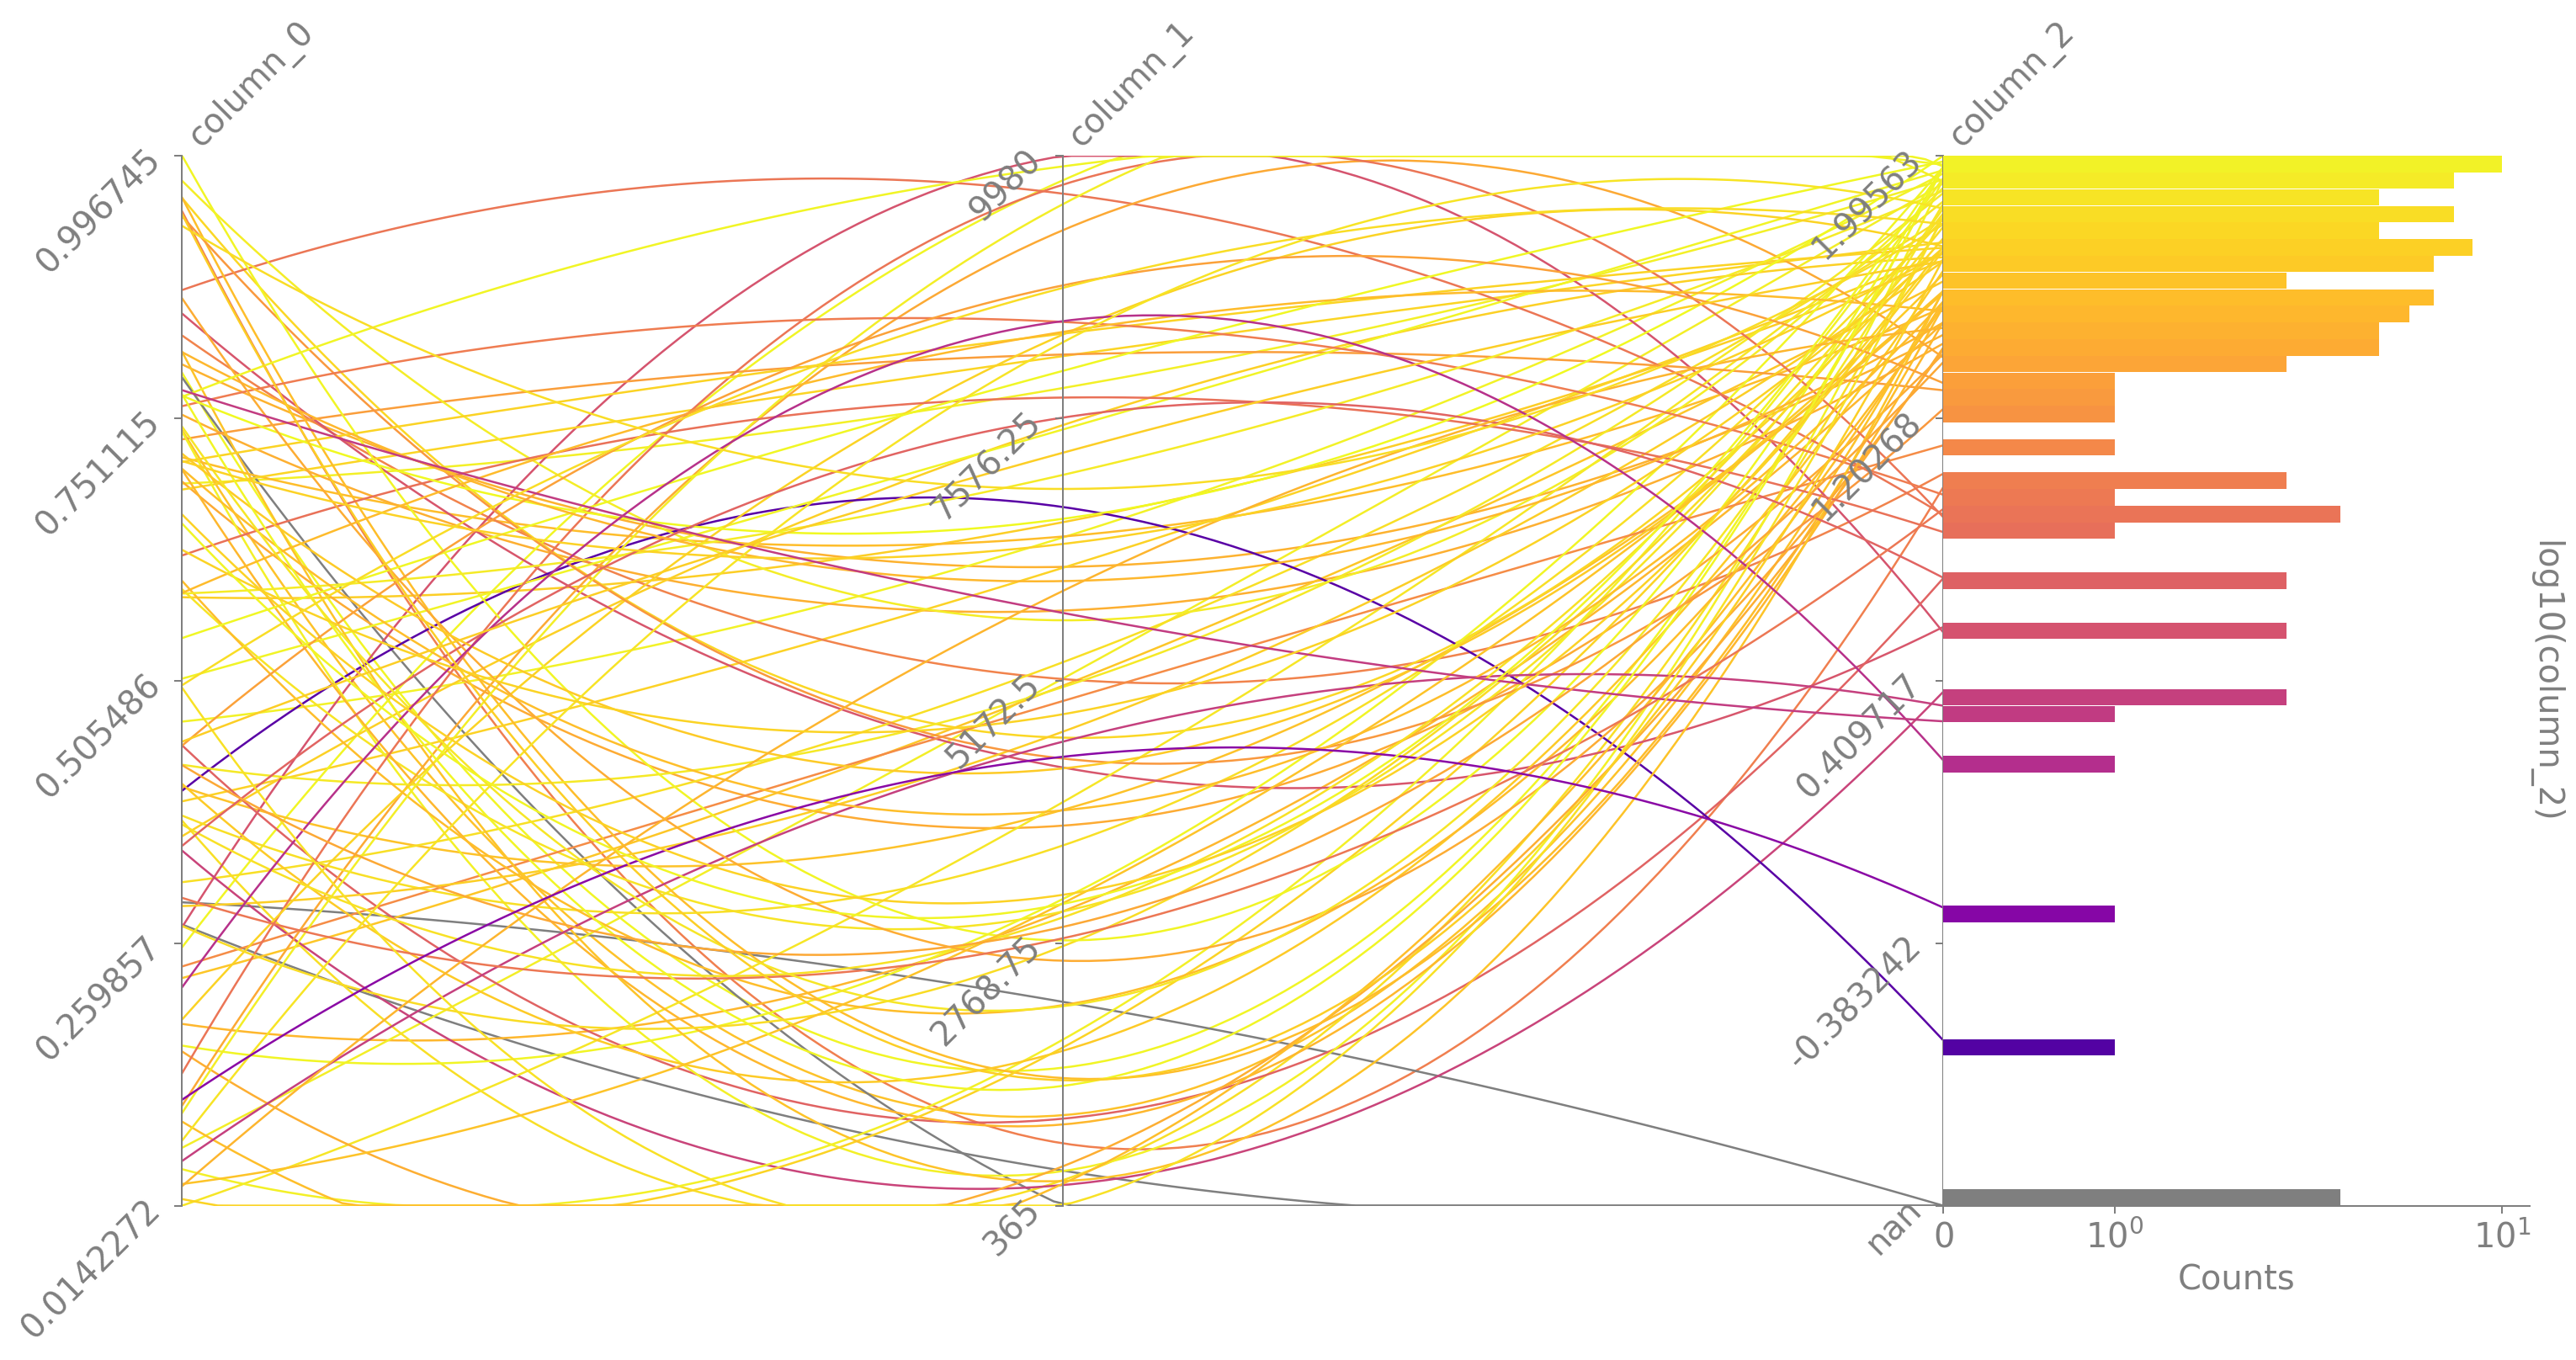

In [90]:
fig, axs = PC.plot(
    coordinates=df_np,
    id_col=0,
    score_col=-1,
    coords_cols=r'^.*$',
    min_score=None, max_score=None, remove_nanscore=True,
    score_scaling='np.log10(pl.col(score_col))',
    show_idcol=None,
    interpkind=None,
    res=None,
    axpos_coord=None, axpos_hist=None,
    ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
    nancolor=None, nanfrac=None,
    linealpha=None, linewidth=None,
    base_cmap=None, cbar_over_hist=None,
    n_jobs=None, n_jobs_addaxes=None, sleep=None,
    map_suffix=None,
    save=False,
    max_nretries=4,
    verbose=None,
    text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
)

plt.show()

# LatentSpaceExplorer

Generate a dummy dataset

In [2]:
class UnravelLatentspace:
    """
        - Generator Class to create polynomials
    """
    def __init__(self) -> None:
        pass

    def predict(self, X_latent:np.ndarray, y=None):

        x = np.linspace(0,1,100)
        X  = np.array([np.polyval(xl, x) for xl in X_latent])

        return X

X_latent, y = make_blobs(n_samples=100, n_features=4, centers=4)


Look at latent dimensions and generated samples (varying 2 latent variables)

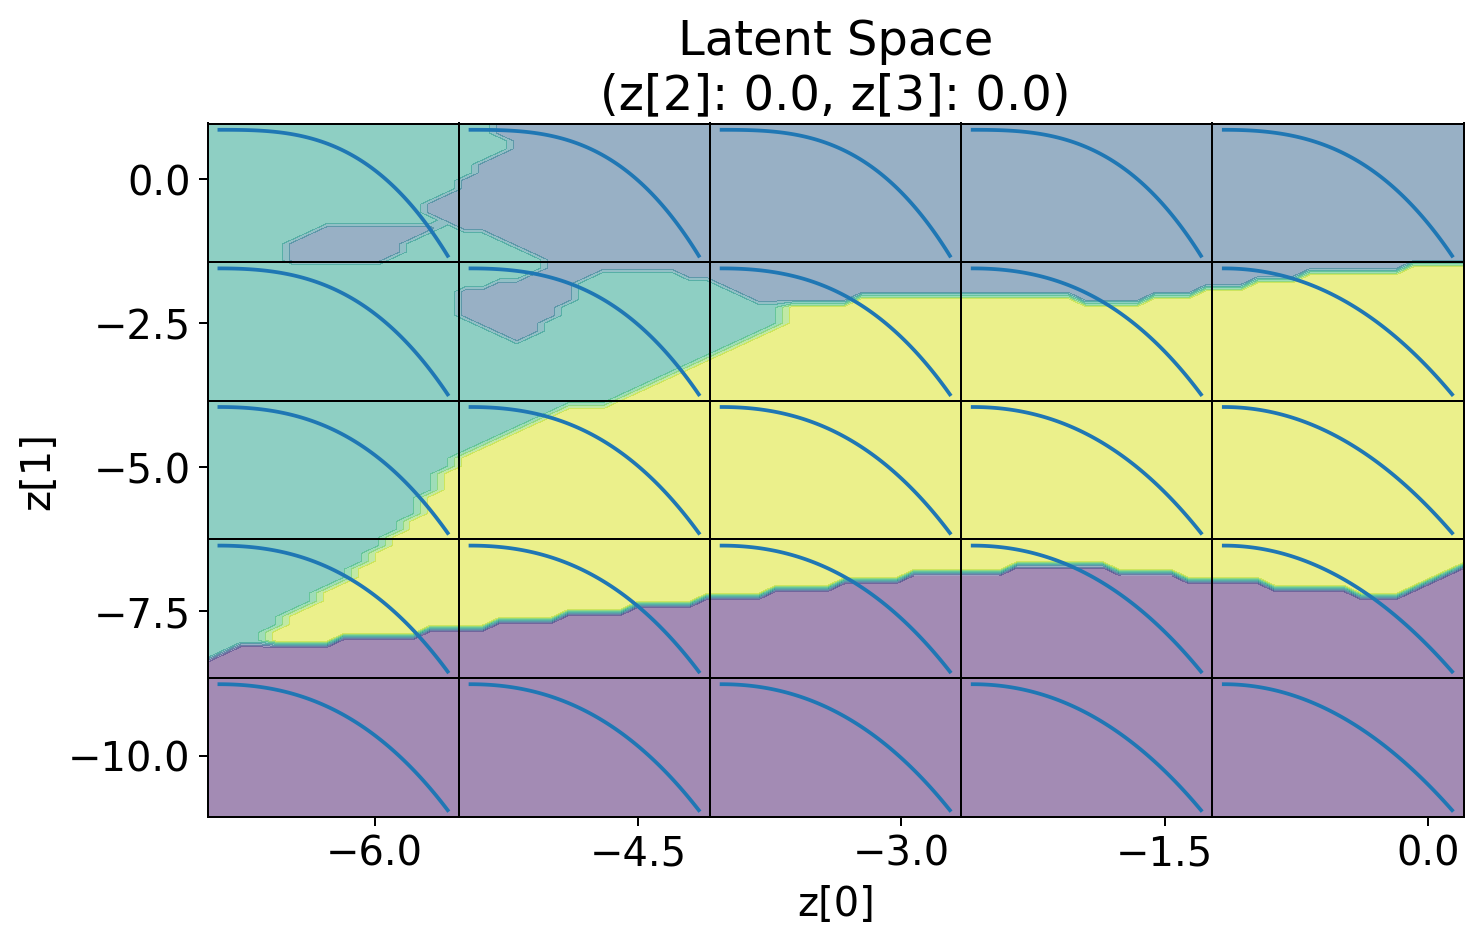

In [3]:
importlib.reload(alvp)

LSE = alvp.LatentSpaceExplorer(
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=1
)

z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
z1 = np.linspace(X_latent[:,1].min()+2,X_latent[:,1].max()-2,5)
fig, axs = LSE.generated_2d(
    generator=UnravelLatentspace(),
    z0=z0, z1=z1,
    zi_f=X_latent.shape[1]-2,
    z0_idx=0, z1_idx=1,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

LSE.plot_dbe(
    X_latent[:,:2], y,
    res=100, k=1,
    ax=axs[-1],
    contourf_kwargs=None,
)

plt.show()

Look at latent dimensions and generated samples (varying 1 latent variable)

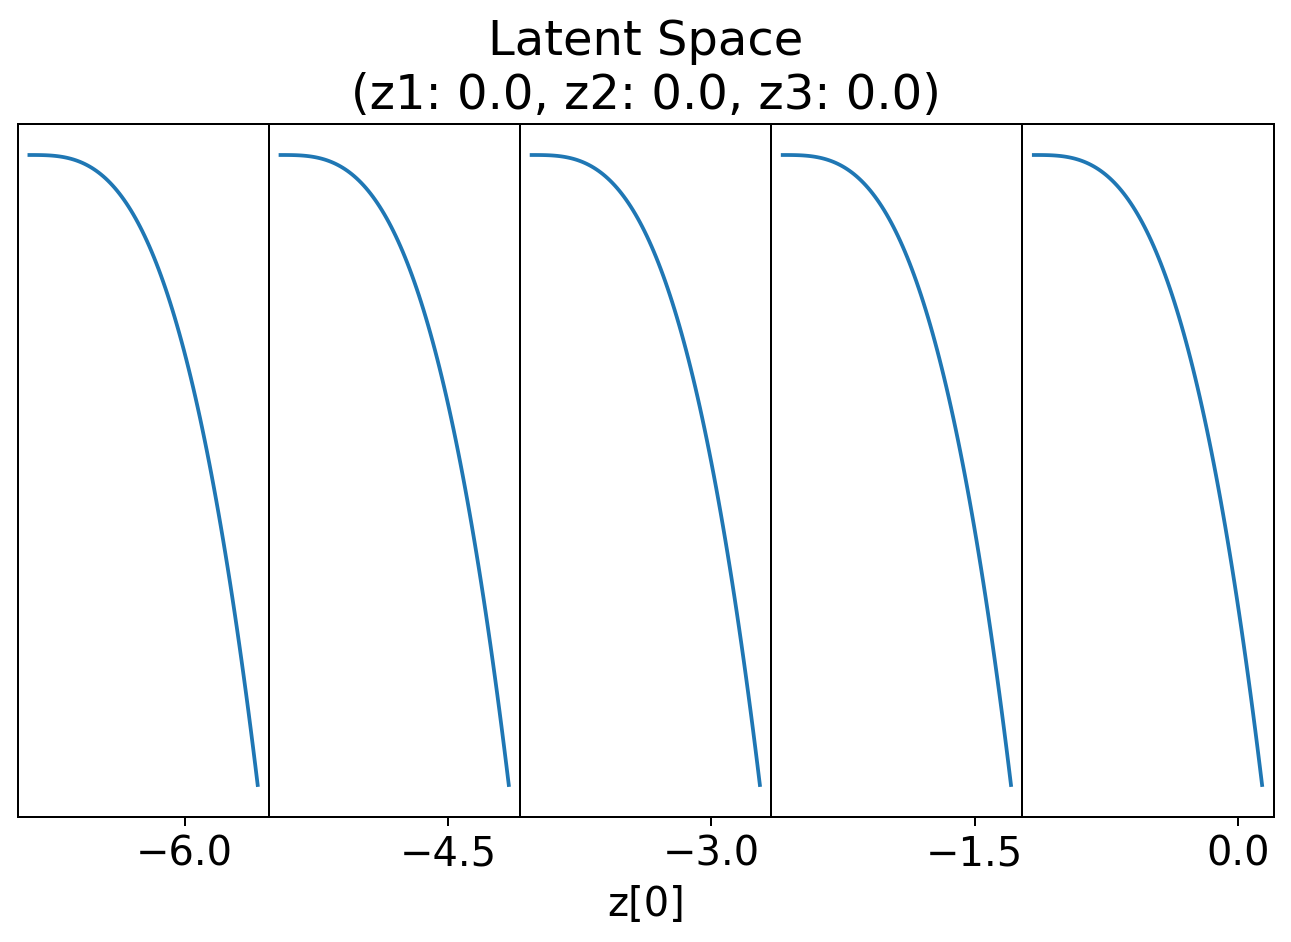

In [4]:
z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
fig, axs = LSE.generated_1d(
    generator=UnravelLatentspace(),
    z0=z0,
    zi_f=X_latent.shape[1]-1,
    z0_idx=0,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

# Corner Plot

Look at pairwise scatter

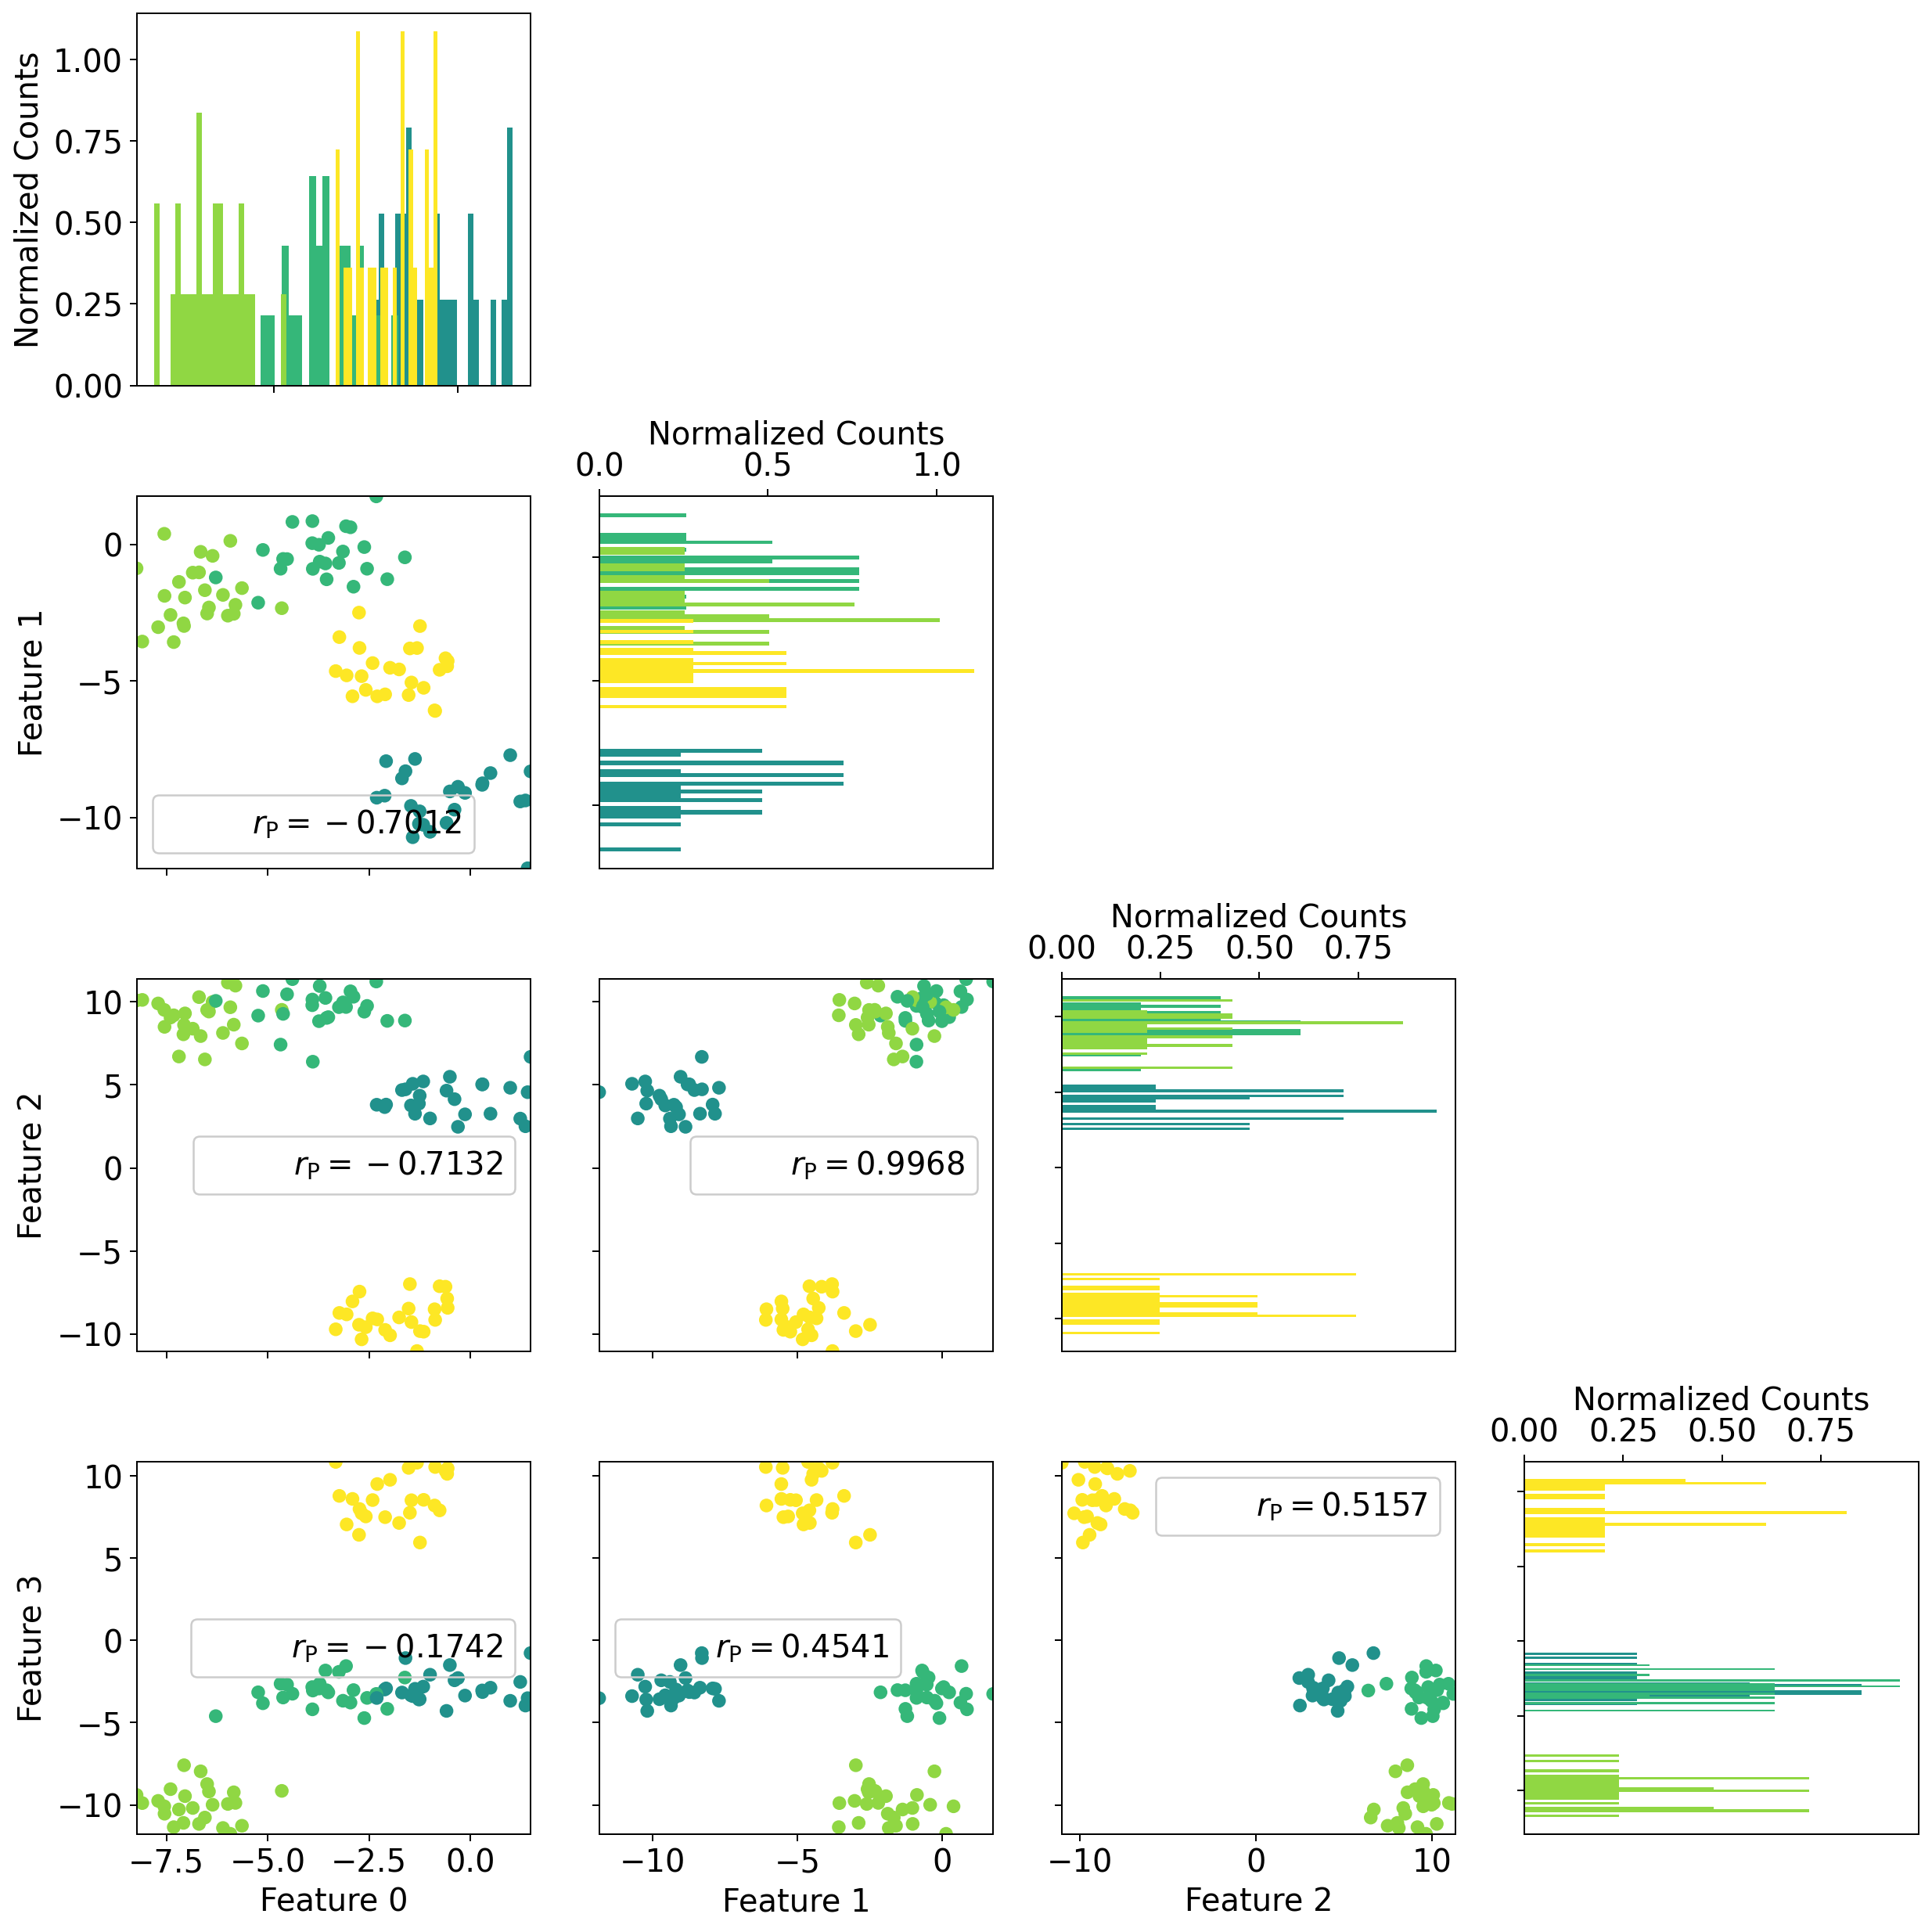

In [13]:
importlib.reload(alvp)

CP = alvp.CornerPlot()

fig = plt.figure(figsize=(14,14))
fig, axs = CP.plot(
    X_latent, y, featurenames=None,
    mus=None, sigmas=None, corrmat=None,
    bins=100,
    cmap='viridis',
    equal_range=False, asstandardnormal=False,
    fig=fig,
    sctr_kwargs={'alpha':1, 'vmin':-3},
    hist_kwargs={'density':True},
)

# Multi Confusion-Matrix

Generate a dummy dataset

In [3]:
import copy
nmodels  = 5
nsamples = np.array([100]*nmodels)
nsamples[2] = 80
y_true = [np.random.randint(0,3, size=(ns)) for ns in nsamples]
y_pred = copy.deepcopy(y_true)

randidxs = [np.random.choice(np.arange(yt.shape[0]), size=(20), replace=False) for yt in y_true]
# y_pred[randidxs] = [np.random.randint(-1,3, (20,nmodels))]
for idx, (yp, ridxs, ns) in enumerate(zip(y_pred, randidxs, nsamples)):
    y_pred[idx][ridxs] = np.random.randint(-1,3, 20)
    
y_true = y_true
y_pred = y_pred

print(len(y_true))
print(y_true[0].shape, y_true[2].shape)

# #plot labels
# for yt, yp in zip(y_true, y_pred): plt.plot(yt-yp)

5
(100,) (80,)


Automatically determine how to display the confusion matrix.

MultiConfusionMatrix(
    score_decimals=2,
    cmap='nipy_spectral', vmin=None, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs={'figsize': (9, 9)},
)


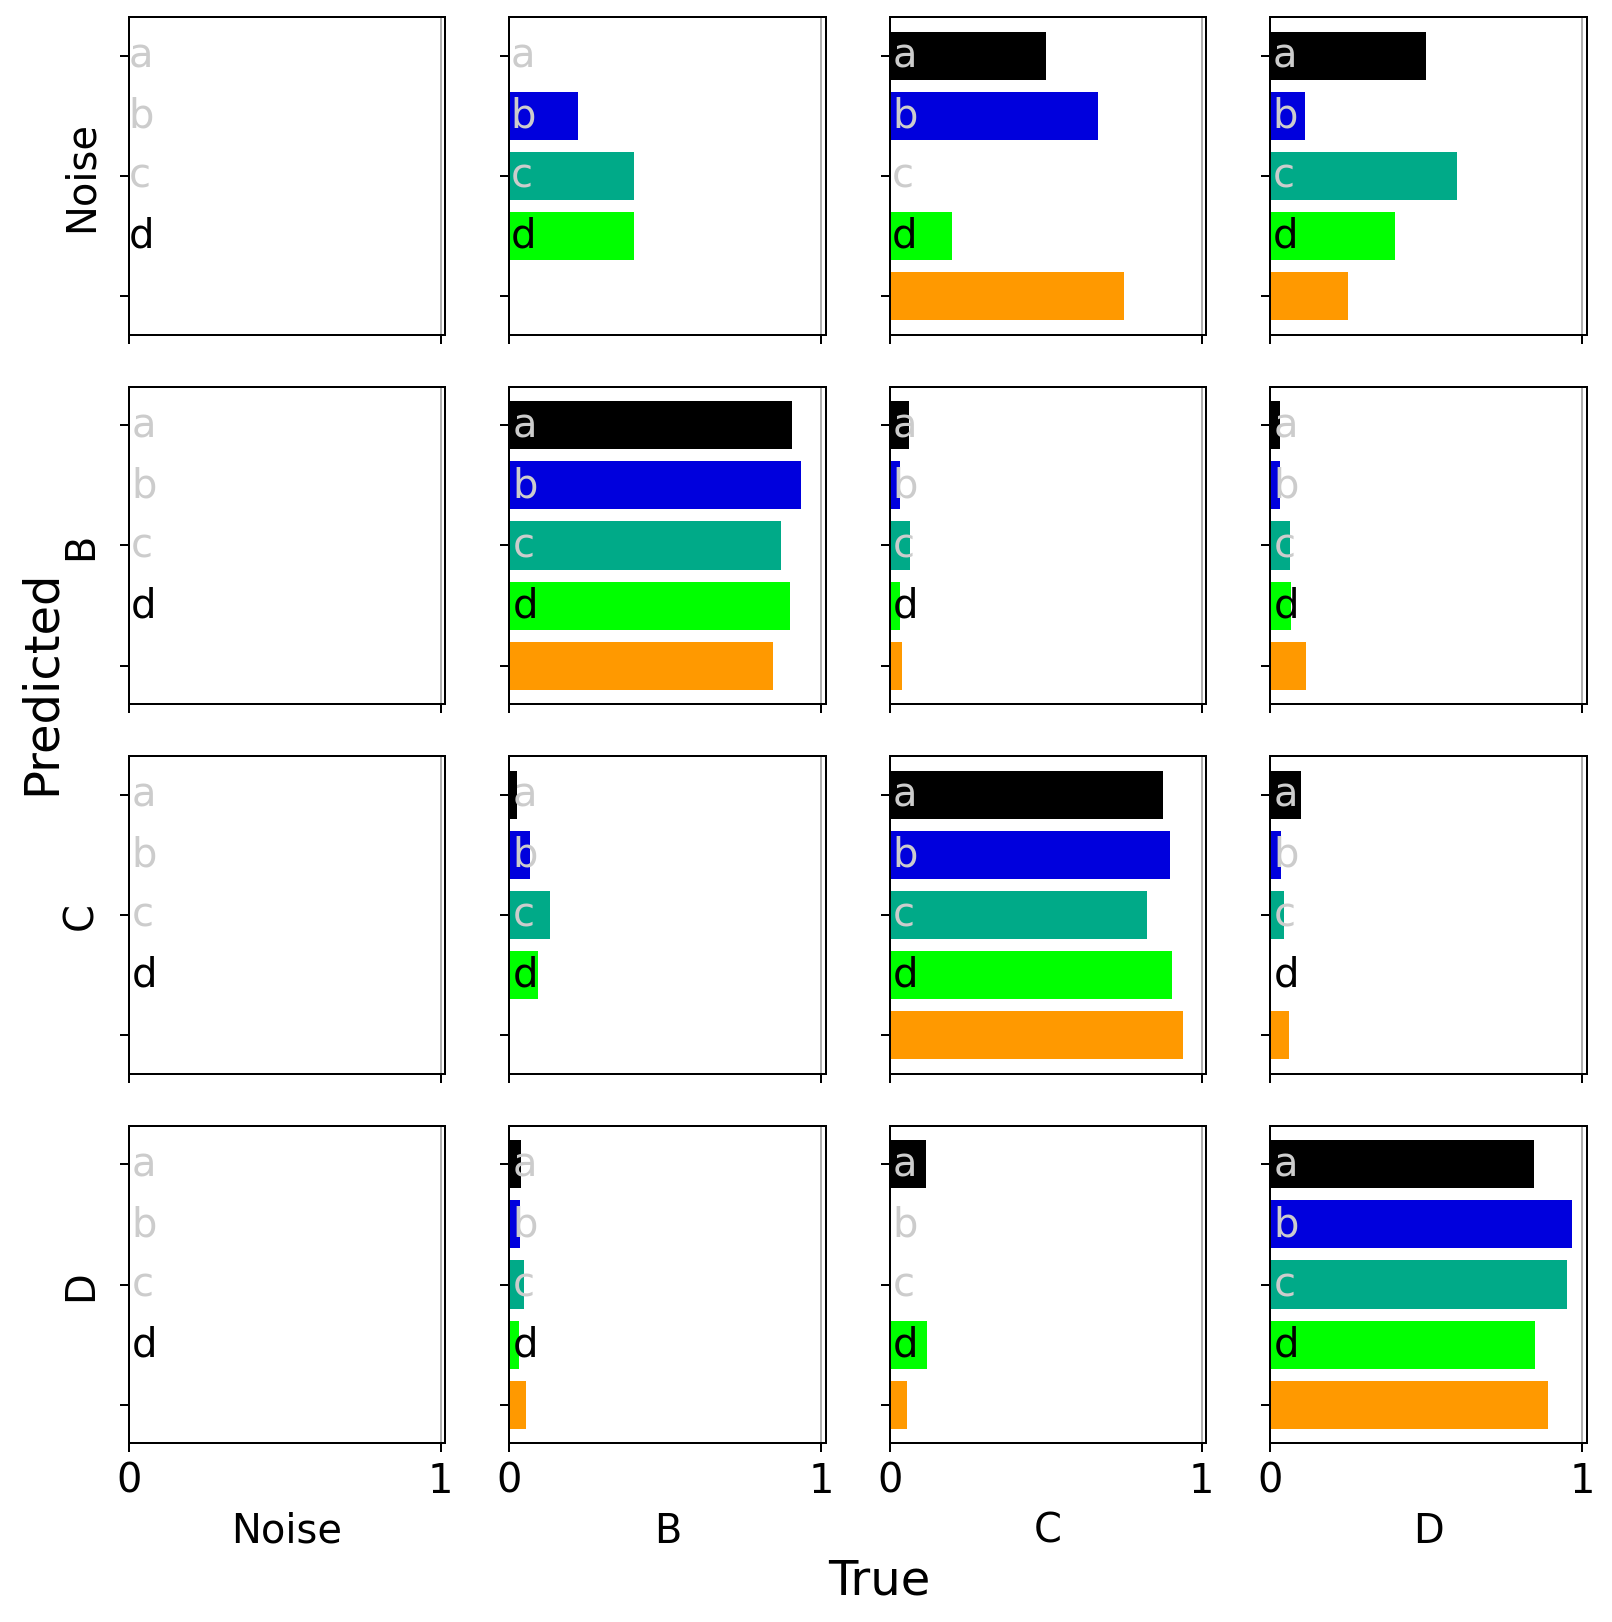

In [5]:
importlib.reload(alvp)


MCM = alvp.MultiConfusionMatrix(
    score_decimals=2,
    cmap='nipy_spectral', vmin=None, vmax=None, vcenter=None,
    verbose=0,
    fig_kwargs=None
)
print(MCM)

fig, axs = MCM.plot(
    y_true, y_pred,
    labels=['Noise', 'B', 'C', 'D'],
    normalize='pred',
    plot_func='auto',
    plot_multimodel_kwargs=dict(
        m_labels='score'
        # m_labels=['a', 'b', 'c', 'd']
    )
)


plt.show()

Force to plot single model

c:\Users\lukas\Documents\GitHub\astroLuSt\demos\..\astroLuSt\visualization\plots.py:3247: UserWarning: `y_true` has to be two dimensional but has shape (1, 100)!
    Called `y_true.reshape(1,-1)`. Therefore you might not get the expected result.
  y_true = y_true.reshape(1,-1)
c:\Users\lukas\Documents\GitHub\astroLuSt\demos\..\astroLuSt\visualization\plots.py:3253: UserWarning: `y_pred` has to be two dimensional but has shape (1, 100)!    Called `y_pred.reshape(1,-1)`. Therefore you might not get the expected result.
  y_pred = y_pred.reshape(1,-1)


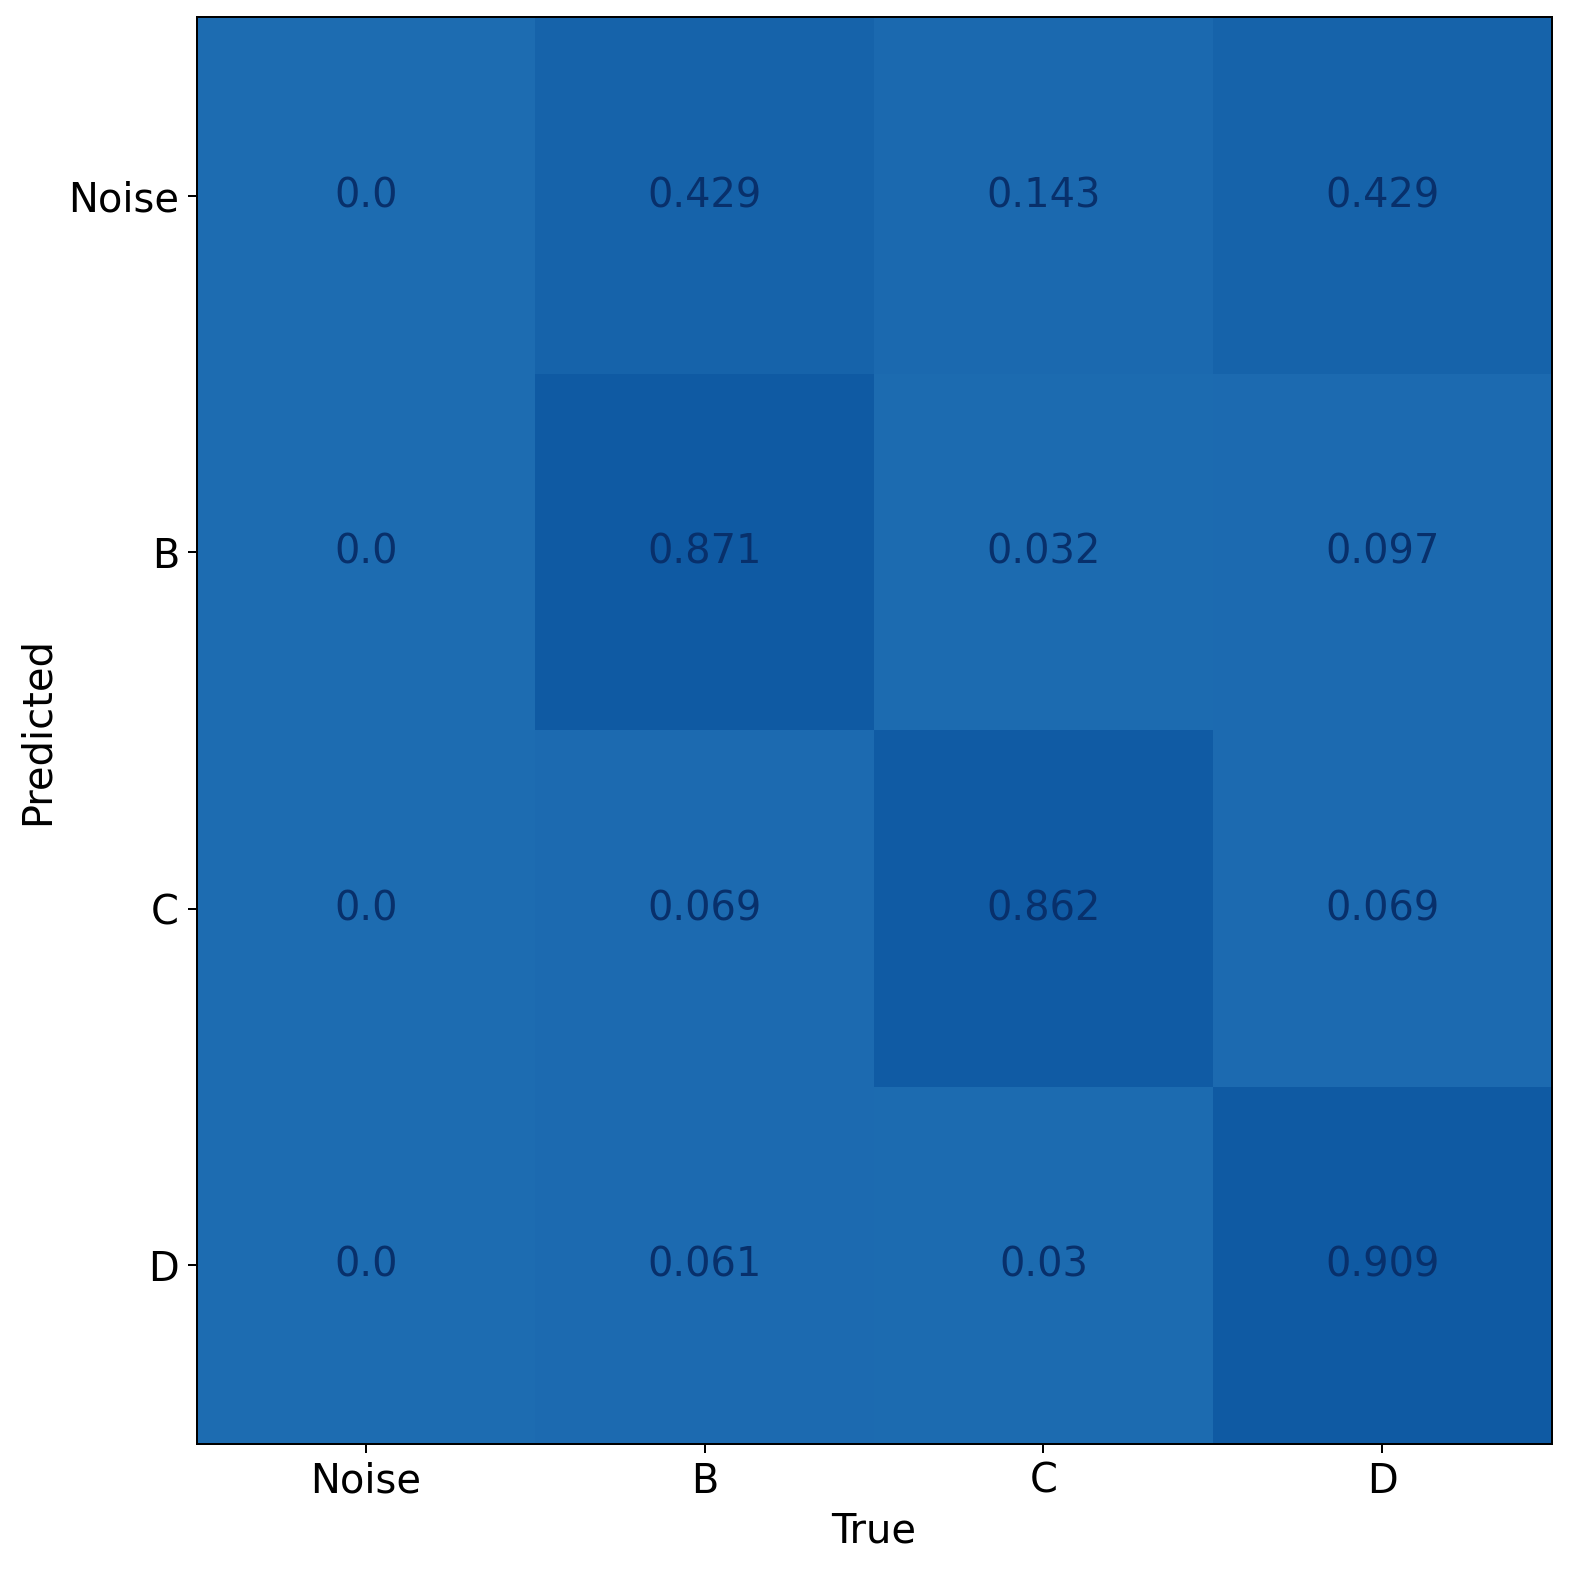

In [25]:
fig, axs = MCM.plot(
    y_true[0], y_pred[0],
    labels=['Noise', 'B', 'C', 'D'],
    normalize='pred',
    plot_func='single',
    plot_singlemodel_kwargs=dict(
        score_decimals=3,
        cmap='Blues', vmin=-10, vmax=3,
        pcolormesh_kwargs={'alpha':1.0},
    ),
)


plt.show()